In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy import stats
import numpy as np

df = pd.read_csv('earthquake_dataset.csv')

data_modified = df[['time', 'latitude', 'longitude', 'mag']]

data_modified['time'] = pd.to_datetime(df['time'])

data_modified.info()
data_modified.head()

# Categorizing earthquakes to earthquakes < 5 or >= 5
# Verifying if the data meets the requirements
type1 = data_modified[data_modified['mag'] >= 5]
type2 = data_modified[data_modified['mag'] < 5]

count_higher = type1['mag'].count()
count_lower = type2['mag'].count()

print("Number of values with mag >= 5:", count_higher)

print("Number of values with mag < 5:", count_lower)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9042 entries, 0 to 9041
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   time       9042 non-null   datetime64[ns, UTC]
 1   latitude   9042 non-null   float64            
 2   longitude  9042 non-null   float64            
 3   mag        9042 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 282.7 KB
Number of values with mag >= 5: 920
Number of values with mag < 5: 8122


C:\Users\Robin\AppData\Local\Temp\ipykernel_24072\464688718.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified['time'] = pd.to_datetime(df['time'])


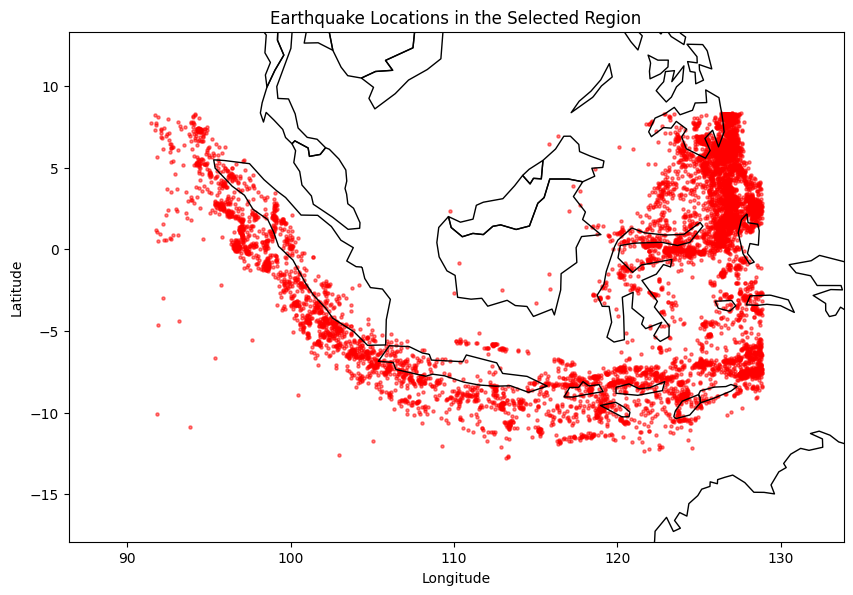

In [2]:
# Plot map of investigating region
df_geo = gpd.GeoDataFrame(data_modified, geometry = gpd.points_from_xy(df.longitude, df.latitude))

# Load the world map (downloaded from Natural Earth)
# Make sure you point this to the correct file location where the shapefiles are extracted
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Defining the extent (bounding box) of the map region 
min_lon, max_lon = 91.406 - 5, 128.848 + 5  # Longitude range
min_lat, max_lat = -12.897 - 5, 8.32 + 5 # Latitude range

# Plot the selected region
fig, ax = plt.subplots(figsize=(10, 8))
world.boundary.plot(ax=ax, linewidth=1, color='black')
df_geo.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5)

# Set xlim and ylim to focus on the specifc area we have chosen
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

# Specify labels for x and y
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.title('Earthquake Locations in the Selected Region')
plt.show()

## Plotting a graph of the number of earthquakes over time

C:\Users\Robin\AppData\Local\Temp\ipykernel_24072\2952785249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified.loc[:, 'year'] = data_modified['time'].dt.year


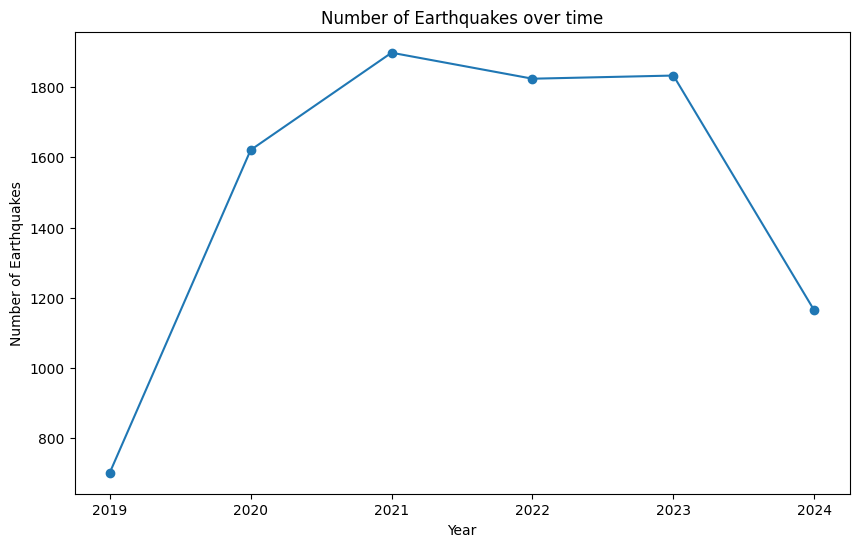

In [3]:
# Group the activities by year and count the number of earthquakes
data_modified.loc[:, 'year'] = data_modified['time'].dt.year

earthquakes_per_year = data_modified.groupby('year').size()

# Plot the number of earthquakes over time
plt.figure(figsize=(10,6))
plt.plot(earthquakes_per_year.index, earthquakes_per_year.values, marker='o')
plt.title('Number of Earthquakes over time')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.show()

## Ploting a graph of the seasonal effect to number of earthquakes

C:\Users\Robin\AppData\Local\Temp\ipykernel_24072\3913250851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified.loc[:, 'month'] = data_modified['time'].dt.month
C:\Users\Robin\AppData\Local\Temp\ipykernel_24072\3913250851.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified['season'] = data_modified['month'].map(month_to_season)


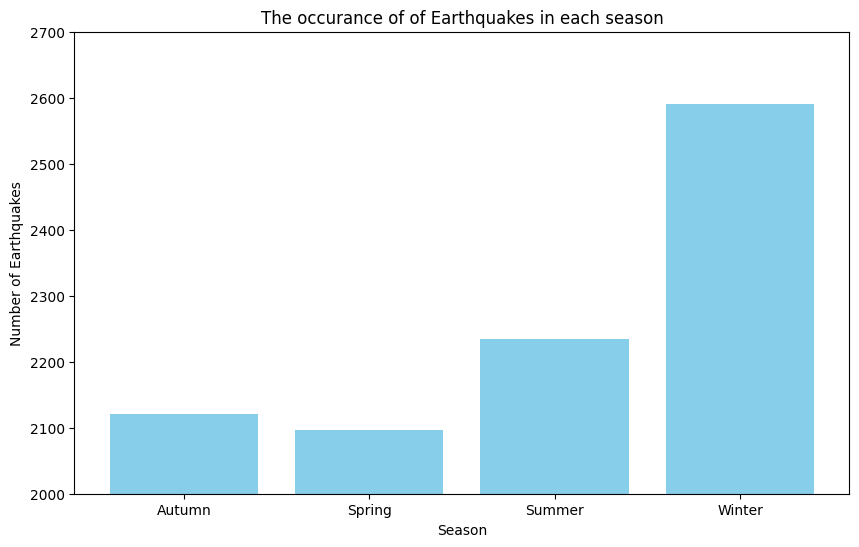

In [4]:
# Group the activities by month and count the number of earthquakes
data_modified.loc[:, 'month'] = data_modified['time'].dt.month

# A dictionary to map months to seasons
month_to_season = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}

data_modified['season'] = data_modified['month'].map(month_to_season)

earthquakes_per_season = data_modified.groupby('season').size()

# Plot the number of earthquakes over time
plt.figure(figsize=(10,6))
plt.bar(earthquakes_per_season.index, earthquakes_per_season.values, color='skyblue')
plt.title('The occurance of of Earthquakes in each season')
plt.xlabel('Season')
plt.ylabel('Number of Earthquakes')
plt.ylim(2000, 2700)
plt.show()

## Plotting the distribution of the magnitude of the earthquakes

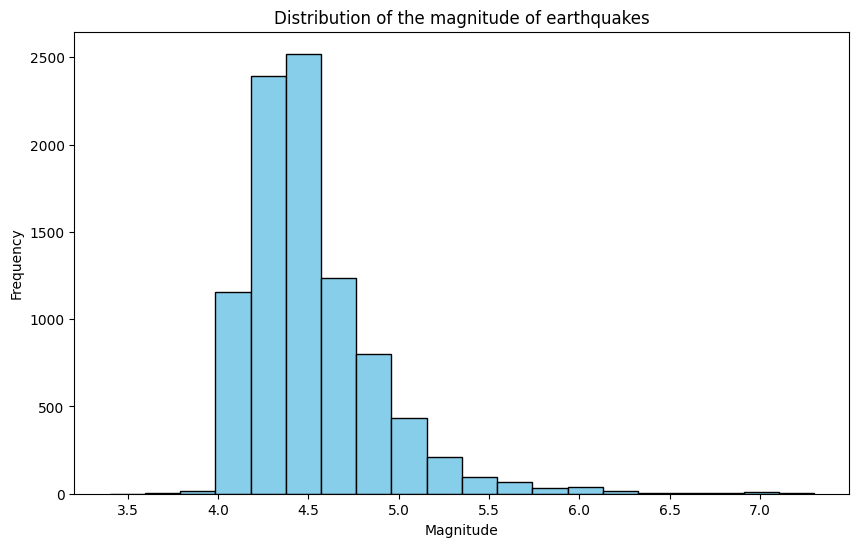

count    9042.000000
mean        4.495211
std         0.377416
min         3.400000
25%         4.300000
50%         4.400000
75%         4.600000
max         7.300000
Name: mag, dtype: float64


In [5]:
# Plot the distribution of the magnitude of earthquakes
plt.figure(figsize=(10,6))
plt.hist(data_modified['mag'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of the magnitude of earthquakes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics of magnitudes
print(df['mag'].describe())

## Distribution Fitting for the dataset

In [6]:
# Create an extra column in the dataframe for the inter arrival times
data_modified['inter_arrival_time'] = data_modified['time'].diff().dt.total_seconds() / 60
x = data_modified['inter_arrival_time'].dropna() # Drop off all the null rows
x.describe()

C:\Users\Robin\AppData\Local\Temp\ipykernel_24072\1123385502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified['inter_arrival_time'] = data_modified['time'].diff().dt.total_seconds() / 60


count    9041.000000
mean      290.895807
std       340.012314
min         0.033100
25%        57.252367
50%       174.926467
75%       400.201433
max      3725.878900
Name: inter_arrival_time, dtype: float64

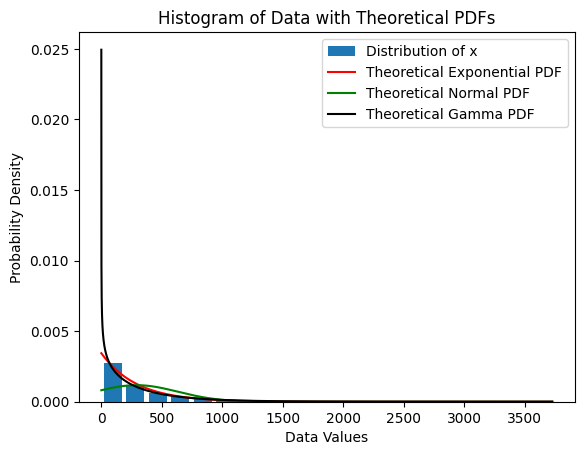

In [7]:
'''
Plotting the histogram of the data and compare the fitted distribution of our 'x' to 3 probability distribution function: Exponential distribution, Normal Distribution, and Gamma distribution.
Then we check which distributions is a good fit to the distribution of x - interarrival times between each earthquakes
'''

# Using the method of moments the parameters for an Exponential, Normal, and Gamma distribution are estimated
M1 = np.mean(x)
M2 = np.mean(x**2)

# Initializing the Exponential Distribution
lamEst = 1 / M1 # lambda = 1 / E[X], formula of lambda
estExpDist = stats.expon(scale=1/lamEst)

# Initializating the Normal Distribution
muEst = M1 # mu = M1 (= estimation of x), E[X] = mu
sigmaEst = np.sqrt(M2 - M1**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist = stats.norm(muEst, sigmaEst)

# Initializing the Gamma Distribution
# E[X] = alpha / beta, Var[X] = alpha / beta**2 -> E[X**2] = alpha(alpha + 1) / beta**2.
# M1 = alpha / beta, M2 = alpha(alpha + 1) / beta**2
alphaEst = M1**2 / (M2 - M1**2) # Alpha is estimated as M1**2 / (M2 - M1**2)
betaEst = M1 / (M2 - M1**2) # Beta is estimated as M1 / (M2 - M1**2)
estGammaDist = stats.gamma(alphaEst, scale=1/betaEst)

# Creating array serving as x-coordinates for plotting the theoretical PDF's
# Use of min(x) and max(x) to ensure that xs has the same range as x
xs = np.arange(min(x), max(x), 0.1)
# Visualising the distribution of x together with the predefined distribution to check
# which distribution aligns the best with the distribution of the data set
plt.figure()
# Plot distribution of X as a blue histogram
plt.hist(x, rwidth = 0.8, bins=20, density=True, label = 'Distribution of x')
# Plot the theoretical exponential PDF as a solid red line
plt.plot(xs, estExpDist.pdf(xs), 'r', label = 'Theoretical Exponential PDF')
# Plot the theoretical normal PDF as a solid green line
plt.plot(xs, estNormDist.pdf(xs), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical gamma PDF as a solid black line
plt.plot(xs, estGammaDist.pdf(xs), 'black', label = 'Theoretical Gamma PDF')
plt.title('Histogram of Data with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

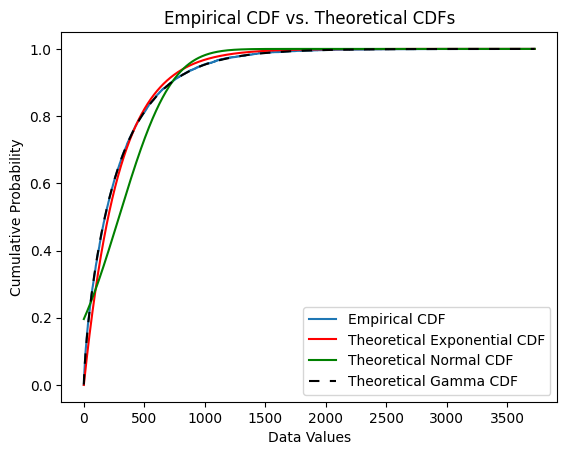

In [8]:
'''
Plotting the histogram of the data and compare the fitted distribution of our 'x' to 3 continuous distribution function: Exponential distribution, Normal Distribution, and Gamma distribution.
Then we check which distributions is a good fit to the emperical continuous distribution function
'''
# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2 = np.sort(x)
# ys is an array of cumulative probabilities and it matches the number of data points in x because it makes use of the len(x) function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys = np.arange(1/len(x), 1 + 1/len(x), 1/len(x))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2, ys, where='post', label = 'Empirical CDF')
# Plot the theoretical exponential CDF as a solid red line
plt.plot(xs2, estExpDist.cdf(xs2), 'r', label = 'Theoretical Exponential CDF')
# Plot the theoretical normal CDF as a solid green line
plt.plot(xs2, estNormDist.cdf(xs2), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical gamma CDF as a dashed black line to make it clearer
plt.plot(xs2, estGammaDist.cdf(xs2), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma CDF')
plt.title('Empirical CDF vs. Theoretical CDFs')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [9]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test
# H0: The empirical distribution function tends to the chosen distribution function of the random variable
print("ktest Exp:", stats.kstest(x, estExpDist.cdf))
print("ktest Norm:", stats.kstest(x, estNormDist.cdf))
print("ktest Gamma:", stats.kstest(x, estGammaDist.cdf))

ktest Exp: KstestResult(statistic=0.07460532950794346, pvalue=3.2906706915158227e-44, statistic_location=62.440266666666666, statistic_sign=1)
ktest Norm: KstestResult(statistic=0.1961386185166058, pvalue=3.233221763609271e-305, statistic_location=0.0331, statistic_sign=-1)
ktest Gamma: KstestResult(statistic=0.007171000656235882, pvalue=0.7383481182496745, statistic_location=2.4821, statistic_sign=-1)


## Distribution fitting for the 2 types of Earthquakes


### Probability of an arbitrary earthquake that has magnitude less than 5

In [10]:
# Calculating probability of an arbitrary earthquake being a type 2 earthquake
# By taking the mean value of the boolean mask
prob_type2 = np.mean(data_modified['mag'] < 5)

print(prob_type2)

0.898252598982526


### Distribution fitting for type 1 Earthquakes

In [11]:
# Create an extra column in the dataframe for the inter arrival times of type 1 data
type1['inter_arrival_time'] = type1['time'].diff().dt.total_seconds() / 60
x_type1 = type1['inter_arrival_time'].dropna() # Drop off all the null rows
x_type1.describe()

C:\Users\Robin\AppData\Local\Temp\ipykernel_24072\834352433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type1['inter_arrival_time'] = type1['time'].diff().dt.total_seconds() / 60


count      919.000000
mean      2849.640568
std       3456.095372
min          0.738150
25%        405.083758
50%       1744.491317
75%       4059.228767
max      24818.368133
Name: inter_arrival_time, dtype: float64

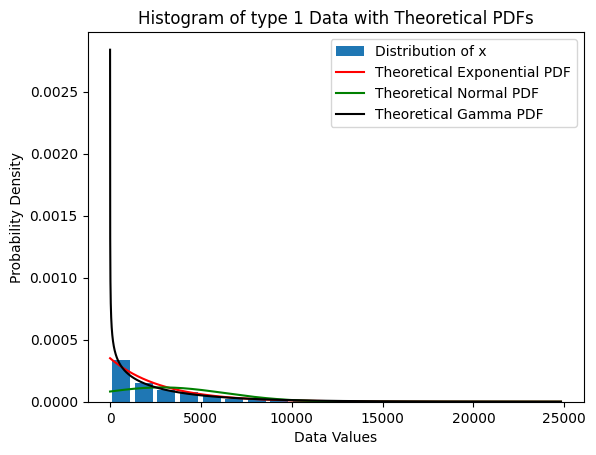

In [12]:
'''
Plotting the histogram of type 1 x(which is the interarrival times between each earthquakes) and compare the fitted distribution of our 'x' to 3 probability distribution function: Exponential distribution, Normal Distribution, and Gamma distribution.
Then we check which distributions is a good fit to the distribution of type 1 x
'''

# Using the method of moments the parameters for an exponential, normal, and gamma distribution are estimated
M1_type1 = np.mean(x_type1)
M2_type1 = np.mean(x_type1**2)

# Initializing the Exponential Distribution
lamEst_type1 = 1 / M1_type1 # lambda = 1 / E[X], formula of lambda
estExpDist_type1 = stats.expon(scale=1/lamEst_type1)

# Initializating the Normal Distribution
muEst_type1 = M1_type1 # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_type1 = np.sqrt(M2_type1 - M1_type1**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_type1 = stats.norm(muEst_type1, sigmaEst_type1)

# Initializing the Gamma Distribution
# E[X] = alpha / beta, Var[X] = alpha / beta**2 -> E[X**2] = alpha(alpha + 1) / beta**2.
# M1 = alpha / beta, M2 = alpha(alpha + 1) / beta**2
alphaEst_type1 = M1_type1**2 / (M2_type1 - M1_type1**2) # Alpha is estimated as M1**2 / (M2 - M1**2)
betaEst_type1 = M1_type1 / (M2_type1 - M1_type1**2) # Beta is estimated as M1 / (M2 - M1**2)
estGammaDist_type1 = stats.gamma(alphaEst_type1, scale=1/betaEst_type1)

# Creating array serving as x-coordinates for plotting the theoretical PDF's
# Use of min(x) and max(x) to ensure that xs has the same range as x
xs_type1 = np.arange(min(x_type1), max(x_type1), 0.1)
# Visualising the distribution of x together with the predefined distribution to check
# which distribution aligns the best with the distribution of the data set
plt.figure()
# Plot distribution of X as a blue histogram
plt.hist(x_type1, rwidth = 0.8, bins=20, density=True, label = 'Distribution of x')
# Plot the theoretical exponential PDF as a solid red line
plt.plot(xs_type1, estExpDist_type1.pdf(xs_type1), 'r', label = 'Theoretical Exponential PDF')
# Plot the theoretical normal PDF as a solid green line
plt.plot(xs_type1, estNormDist_type1.pdf(xs_type1), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical gamma PDF as a solid black line
plt.plot(xs_type1, estGammaDist_type1.pdf(xs_type1), 'black', label = 'Theoretical Gamma PDF')
plt.title('Histogram of type 1 Data with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

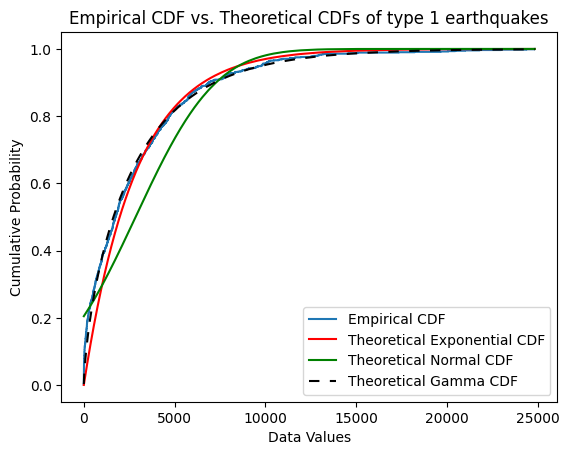

In [13]:
'''
Plotting the line plot of the empirical CDF of type 1 x(which is the interarrival times between each earthquakes) and compare the fitted distribution of our 'x' to 3 continuous distribution function: Exponential distribution, Normal Distribution, and Gamma distribution.
Then we check which distributions is a good fit to the emperical continuous distribution function
'''
# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_type1 = np.sort(x_type1)
# ys is an array of cumulative probabilities and it matches the number of data points in x because it makes use of the len(x) function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_type1 = np.arange(1/len(x_type1), 1 + 1/len(x_type1), 1/len(x_type1))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_type1, ys_type1, where='post', label = 'Empirical CDF')
# Plot the theoretical exponential CDF as a solid red line
plt.plot(xs2_type1, estExpDist_type1.cdf(xs2_type1), 'r', label = 'Theoretical Exponential CDF')
# Plot the theoretical normal CDF as a solid green line
plt.plot(xs2_type1, estNormDist_type1.cdf(xs2_type1), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical gamma CDF as a dashed black line to make it clearer
plt.plot(xs2_type1, estGammaDist_type1.cdf(xs2_type1), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of type 1 earthquakes')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [14]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test
# H0: the empirical distribution function tends to the chosen distribution function of the random variable
print("ktest Exp:", stats.kstest(x_type1, estExpDist_type1.cdf))
print("ktest Norm:", stats.kstest(x_type1, estNormDist_type1.cdf))
print("ktest Gamma:", stats.kstest(x_type1, estGammaDist_type1.cdf))

ktest Exp: KstestResult(statistic=0.12789982962698873, pvalue=1.4498411242998488e-13, statistic_location=250.9183833333333, statistic_sign=1)
ktest Norm: KstestResult(statistic=0.20475356315806137, pvalue=2.9184718962544368e-34, statistic_location=0.73815, statistic_sign=-1)
ktest Gamma: KstestResult(statistic=0.06023975008023046, pvalue=0.0024281838158709645, statistic_location=47.05323333333333, statistic_sign=1)


### Distribution fitting with type 2 data

In [15]:
# Create an extra column in the dataframe for the inter arrival times of type 2 data
type2['inter_arrival_time'] = type2['time'].diff().dt.total_seconds() / 60
x_type2 = type2['inter_arrival_time'].dropna() # Drop off all the null rows
x_type2.describe()

C:\Users\Robin\AppData\Local\Temp\ipykernel_24072\2575134362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type2['inter_arrival_time'] = type2['time'].diff().dt.total_seconds() / 60


count    8121.000000
mean      323.727129
std       372.539001
min         0.033100
25%        66.749217
50%       198.598567
75%       444.269533
max      3725.878900
Name: inter_arrival_time, dtype: float64

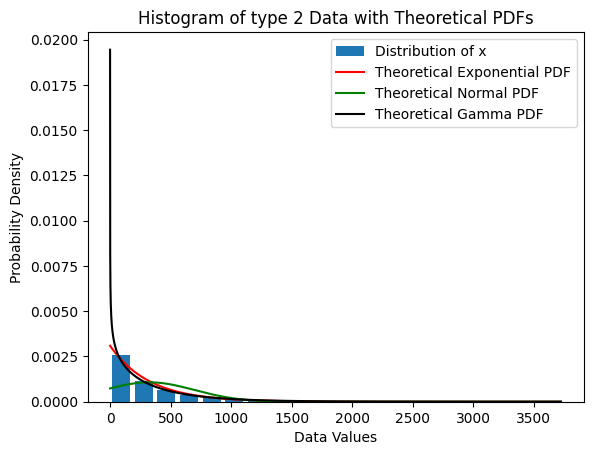

In [16]:
'''
Plotting the histogram of type 2 x(which is the interarrival times between each earthquakes) and compare the fitted distribution of our 'x' to 3 probability distribution function: Exponential distribution, Normal Distribution, and Gamma distribution.
Then we check which distributions is a good fit to the distribution of type 2 x
'''

# Using the method of moments the parameters for an exponential, normal, and gamma distribution are estimated
M1_type2 = np.mean(x_type2)
M2_type2 = np.mean(x_type2**2)

# Initializing the Exponential Distribution
lamEst_type2 = 1 / M1_type2 # lambda = 1 / E[X], formula of lambda
estExpDist_type2 = stats.expon(scale=1/lamEst_type2)

# Initializating the Normal Distribution
muEst_type2 = M1_type2 # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_type2 = np.sqrt(M2_type2 - M1_type2**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_type2 = stats.norm(muEst_type2, sigmaEst_type2)

# Initializing the Gamma Distribution
# E[X] = alpha / beta, Var[X] = alpha / beta**2 -> E[X**2] = alpha(alpha + 1) / beta**2.
# M1 = alpha / beta, M2 = alpha(alpha + 1) / beta**2
alphaEst_type2 = M1_type2**2 / (M2_type2 - M1_type2**2) # Alpha is estimated as M1**2 / (M2 - M1**2)
betaEst_type2 = M1_type2 / (M2_type2 - M1_type2**2) # Beta is estimated as M1 / (M2 - M1**2)
estGammaDist_type2 = stats.gamma(alphaEst_type2, scale=1/betaEst_type2)

# Creating array serving as x-coordinates for plotting the theoretical PDF's
# Use of min(x) and max(x) to ensure that xs has the same range as x
xs_type2 = np.arange(min(x_type2), max(x_type2), 0.1)
# Visualising the distribution of x together with the predefined distribution to check
# which distribution aligns the best with the distribution of the data set
plt.figure()
# Plot distribution of X as a blue histogram
plt.hist(x_type2, rwidth = 0.8, bins=20, density=True, label = 'Distribution of x')
# Plot the theoretical exponential PDF as a solid red line
plt.plot(xs_type2, estExpDist_type2.pdf(xs_type2), 'r', label = 'Theoretical Exponential PDF')
# Plot the theoretical normal PDF as a solid green line
plt.plot(xs_type2, estNormDist_type2.pdf(xs_type2), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical gamma PDF as a solid black line
plt.plot(xs_type2, estGammaDist_type2.pdf(xs_type2), 'black', label = 'Theoretical Gamma PDF')
plt.title('Histogram of type 2 Data with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

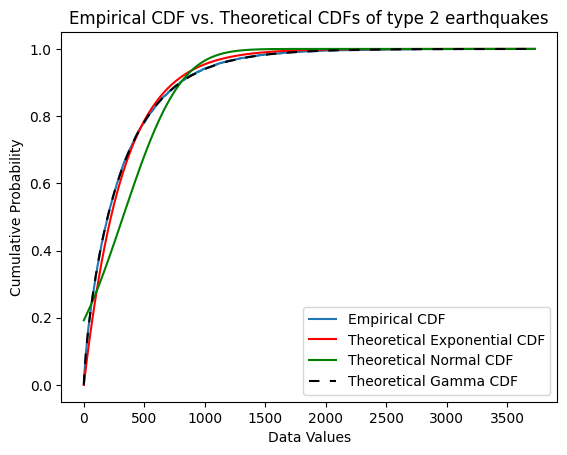

In [17]:
'''
Plotting the line plot of the ECDF of type 2 x(which is the interarrival times between each earthquakes) and compare the fitted distribution of our 'x' to 3 continuous distribution function: 
Exponential distribution, Normal Distribution, and Gamma distribution.
Then we check which distributions is a good fit to the emperical continuous distribution function
'''
# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_type2 = np.sort(x_type2)
# ys is an array of cumulative probabilities and it matches the number of data points in x because it makes use of the len(x) function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_type2 = np.arange(1/len(x_type2), 1 + 1/len(x_type2), 1/len(x_type2))[:len(x_type2)]
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_type2, ys_type2, where='post', label = 'Empirical CDF')
# Plot the theoretical exponential CDF as a solid red line
plt.plot(xs2_type2, estExpDist_type2.cdf(xs2_type2), 'r', label = 'Theoretical Exponential CDF')
# Plot the theoretical normal CDF as a solid green line
plt.plot(xs2_type2, estNormDist_type2.cdf(xs2_type2), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical gamma CDF as a dashed black line to make it clearer
plt.plot(xs2_type2, estGammaDist_type2.cdf(xs2_type2), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of type 2 earthquakes')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [18]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test for type 2 data
# H0: the empirical distribution function tends to the chosen distribution function of the random variable
print("ktest Exp:", stats.kstest(x_type2, estExpDist_type2.cdf))
print("ktest Norm:", stats.kstest(x_type2, estNormDist_type2.cdf))
print("ktest Gamma:", stats.kstest(x_type2, estGammaDist_type2.cdf))

ktest Exp: KstestResult(statistic=0.06570479096713569, pvalue=6.329777916347597e-31, statistic_location=62.43241666666667, statistic_sign=1)
ktest Norm: KstestResult(statistic=0.19244003278901378, pvalue=6.817730879666909e-264, statistic_location=0.0331, statistic_sign=-1)
ktest Gamma: KstestResult(statistic=0.00685451344107735, pvalue=0.837397817530792, statistic_location=2.514816666666667, statistic_sign=-1)


# Stochastic Simulation

In [19]:
T = 365*24*60 # Simulation is done for next year and is converted to minutes for the simulation

nrRuns = 100 # Number of runs, used to define how many simulations are done before calculating the statistics and plotting

def simEarthquakes(alpha, beta, T):
    Nt = 0 # Counting the number of earthquakes
    # Distribution for the inter arrival times between earthquakes. As found previously, this follows a Gamma distribution
    interArrDist = stats.gamma(alpha, scale=1/beta) 
    t = interArrDist.rvs() # Time variable
    
    # The simulation is done for one year, so as long as the time variable is smaller than one year the simulation will continue
    while t < T:
        Nt += 1 # An earthquake occured, so counter raised by one
        t += interArrDist.rvs() # Time variable is raised by the inter arrival time, which distribution is defined above
        
    return Nt # Return the number of earthquakes that occured in the next year (365 days)

## Method 1: Sampling over the two types of earthquakes

### Simulated type 1 data

In [20]:
sim_type1 = [simEarthquakes(alphaEst_type1, betaEst_type1, T) for _ in range(nrRuns)]
sample_mean_type1 = np.mean(sim_type1)
sample_std_type1 = np.std(sim_type1)

print(f'Mean N1(T): {sample_mean_type1}')
print(f'Standard Deviation N1(T): {sample_std_type1}')

# Create an confidence interval for the mean of N1(T) using alpha = 0.05 resulting in a z-statistic of 1.96
# Since the standard deviation is unknown and replaced by a sample standard deviation should we actually use the t-statistic
# instead of the z-statistic. However, because we have so much data it is fine to use the z-statistic
halfwidth_type1 = 1.96 * sample_std_type1 / np.sqrt(nrRuns)
print(f'Confidence interval mean N1(T): {(sample_mean_type1 - halfwidth_type1, sample_mean_type1 + halfwidth_type1)}')
print(f'Confidence interval mean N1(T): {sample_mean_type1} +/- {halfwidth_type1}')

Mean N1(T): 184.47
Standard Deviation N1(T): 16.409421074492542
Confidence interval mean N1(T): (181.25375346939947, 187.68624653060053)
Confidence interval mean N1(T): 184.47 +/- 3.216246530600538


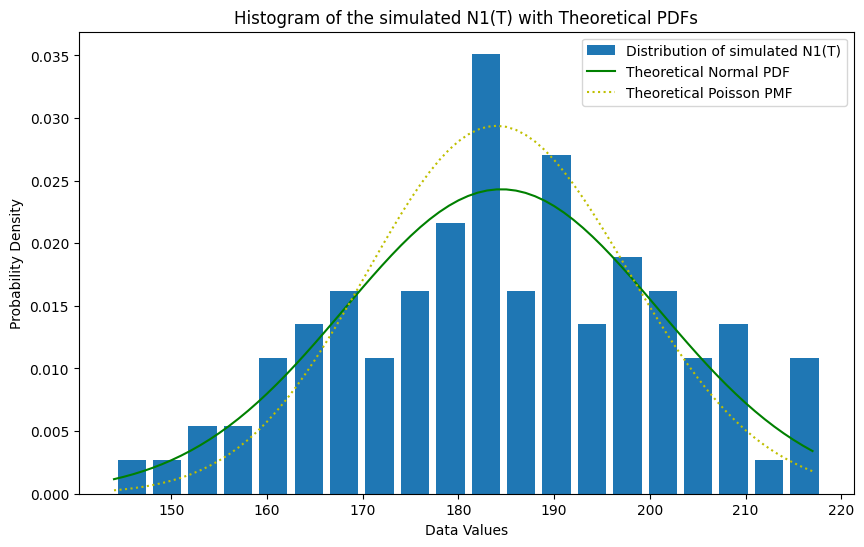

In [21]:
'''
Plotting the histogram of simulated number of type 1 earthquakes and compare the fitted distribution of this to 2 probability distribution function:
Normal Distribution and Poisson distribution.
Then we check which distributions is a good fit to the distribution of number of type 1 earthquakes (N1(T))
'''

# Using the method of moments the parameters for an exponential, normal, and gamma distribution are estimated
M1_type1_NT = sample_mean_type1
M2_type1_NT = np.mean(np.square(sim_type1))

# Initializating the Normal Distribution
muEst_type1_NT = M1_type1_NT # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_type1_NT = np.sqrt(M2_type1_NT - M1_type1_NT**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_type1_NT = stats.norm(muEst_type1_NT, sigmaEst_type1_NT)

# Initializing the Poisson Distribution
# E[X] = lambda
# Therefore, lambda could be estimated as M1
lamEst_Poi_type1_NT = M1_type1_NT
estPoisDist_type1_NT = stats.poisson(lamEst_Poi_type1_NT)

# Creating array serving as x-coordinates for plotting the theoretical PDF's/PMF
# Use of min() and max() to ensure that xs has the same range as NrType2
xs_type1_NT = np.arange(min(sim_type1), max(sim_type1), 1)

# Visualising the distribution of N1(T) together with the predefined distribution to check
# which distribution aligns the best with the distribution of the data set
plt.figure(figsize=(10,6))
# Plot distribution of N1(T) as a blue histogram
plt.hist(sim_type1, rwidth = 0.8, bins=20, density=True, label = 'Distribution of simulated N1(T)')
# Plot the theoretical Normal PDF as a solid green line
plt.plot(xs_type1_NT, estNormDist_type1_NT.pdf(xs_type1_NT), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical Poisson PMF as a dotted yellow line
plt.plot(xs_type1_NT, estPoisDist_type1_NT.pmf(xs_type1_NT), 'y', linestyle=':', label = 'Theoretical Poisson PMF')
plt.title('Histogram of the simulated N1(T) with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

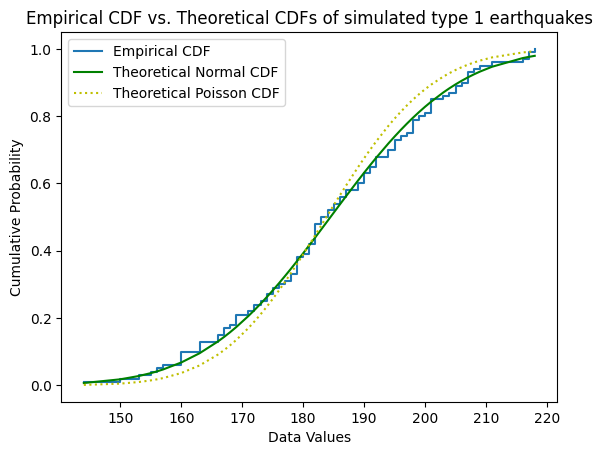

In [22]:
'''
Plotting the Empirical CDF of simulated N1(T) and compare to 2 CDFs: 
Normal distribution and Poisson distribution.
Then we check which distributions is a good fit to the emperical CDF of N1(T)
'''
# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_type1_NT = np.sort(sim_type1)
# ys is an array of cumulative probabilities and it matches the number of data points in x because it makes use of the len(x) function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_type1_NT = np.arange(1/len(sim_type1), 1 + 1/len(sim_type1), 1/len(sim_type1))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_type1_NT, ys_type1_NT, where='post', label = 'Empirical CDF')
# Plot the theoretical normal CDF as a solid green line
plt.plot(xs2_type1_NT, estNormDist_type1_NT.cdf(xs2_type1_NT), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical poisson CDF as a dotted yellow line 
plt.plot(xs2_type1_NT, estPoisDist_type1_NT.cdf(xs2_type1_NT), 'y', linestyle=':', label = 'Theoretical Poisson CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of simulated type 1 earthquakes')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [23]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test for N1(T)
# H0: the empirical distribution function tends to the chosen distribution function of N1(T)
print("ktest Norm:", stats.kstest(sim_type1, estNormDist_type1_NT.cdf))
print("ktest Poisson:", stats.kstest(sim_type1, estPoisDist_type1_NT.cdf))

ktest Norm: KstestResult(statistic=0.045179723881276335, pvalue=0.9812171167213702, statistic_location=198, statistic_sign=-1)
ktest Poisson: KstestResult(statistic=0.09906202356276939, pvalue=0.26243192551840244, statistic_location=198, statistic_sign=-1)


### Simulated type 2 data


In [24]:
sim_type2 = [simEarthquakes(alphaEst_type2, betaEst_type2, T) for _ in range(nrRuns)]
# Calculate sample mean and sample standard deviation
sample_mean_type2 = np.mean(sim_type2)
sample_std_type2 = np.std(sim_type2)

print(f'Mean N2(T): {sample_mean_type2}')
print(f'Standard Deviation N2(T): {sample_std_type2}')

# Create an confidence interval for the mean of N2(T) using alpha = 0.05 resulting in a z-statistic of 1.96
# Since the standard deviation is unknown and replaced by a sample standard deviation should we actually use the t-statistic
# instead of the z-statistic. However, because we have so much data it is fine to use the z-statistic
halfwidth_type2 = 1.96 * sample_std_type2 / np.sqrt(nrRuns)
print(f'Confidence interval mean N2(T): {(sample_mean_type2 - halfwidth_type2, sample_mean_type2 + halfwidth_type2)}')
print(f'Confidence interval mean N2(T): {sample_mean_type2} +/- {halfwidth_type2}')

Mean N2(T): 1631.94
Standard Deviation N2(T): 45.6615418048931
Confidence interval mean N2(T): (1622.990337806241, 1640.889662193759)
Confidence interval mean N2(T): 1631.94 +/- 8.949662193759048


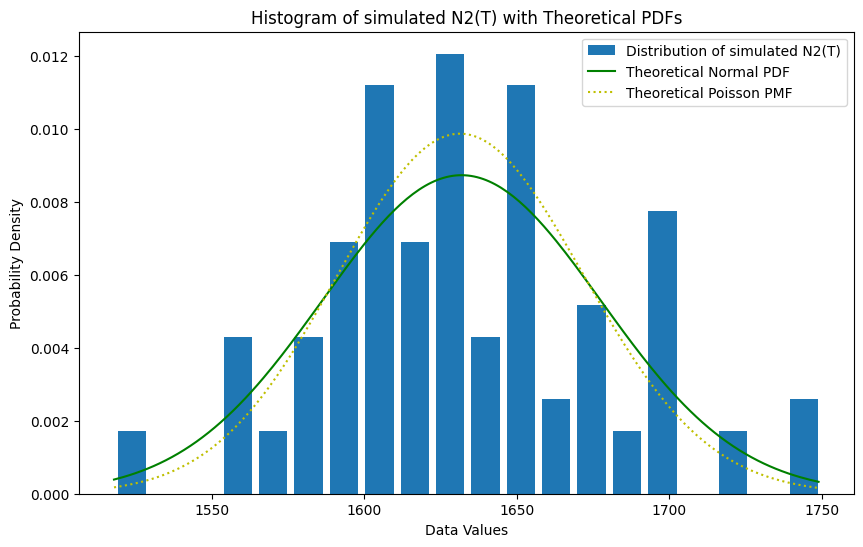

In [25]:
'''
Plotting the histogram of simulated number of type 2 earthquakes and compare the fitted distribution of this to 2 probability distribution function:
Normal Distribution and Poisson distribution.
Then we check which distributions is a good fit to the distribution of number of type 2 earthquakes (N2(T))
'''

# Using the method of moments the parameters for an exponential, normal, and gamma distribution are estimated
M1_type2_NT = sample_mean_type2
M2_type2_NT = np.mean(np.square(sim_type2))

# Initializating the Normal Distribution
muEst_type2_NT = M1_type2_NT # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_type2_NT = np.sqrt(M2_type2_NT - M1_type2_NT**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_type2_NT = stats.norm(muEst_type2_NT, sigmaEst_type2_NT)

# Initializing the Poisson Distribution
# E[X] = lambda
# Therefore, lambda could be estimated as M1
lamEst_Poi_type2_NT = M1_type2_NT
estPoisDist_type2_NT = stats.poisson(lamEst_Poi_type2_NT)

# Creating array serving as x-coordinates for plotting the theoretical PDF's/PMF
# Use of min() and max() to ensure that xs has the same range as NrType2
xs_type2_NT = np.arange(min(sim_type2), max(sim_type2), 1)

# Visualising the distribution of N2(T) together with the predefined distribution to check
# which distribution aligns the best with the distribution of the data set
plt.figure(figsize=(10,6))
# Plot distribution of N2(T) as a blue histogram
plt.hist(sim_type2, rwidth = 0.8, bins=20, density=True, label = 'Distribution of simulated N2(T)')
# Plot the theoretical Normal PDF as a solid green line
plt.plot(xs_type2_NT, estNormDist_type2_NT.pdf(xs_type2_NT), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical Poisson PMF as a dotted yellow line
plt.plot(xs_type2_NT, estPoisDist_type2_NT.pmf(xs_type2_NT), 'y', linestyle=':', label = 'Theoretical Poisson PMF')
plt.title('Histogram of simulated N2(T) with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

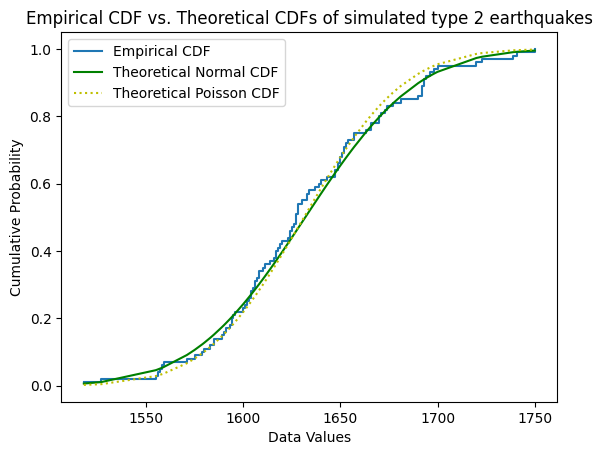

In [26]:
'''
Plotting the Empirical CDF of simulated N2(T) and compare to 2 CDFs: 
Normal distribution and Poisson distribution.
Then we check which distributions is a good fit to the emperical CDF of N2(T)
'''

# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_type2_NT = np.sort(sim_type2)
# ys is an array of cumulative probabilities and it matches the number of data points in x because it makes use of the len() function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_type2_NT = np.arange(1/len(sim_type2), 1 + 1/len(sim_type2), 1/len(sim_type2))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_type2_NT, ys_type1_NT, where='post', label = 'Empirical CDF')
# Plot the theoretical normal CDF as a solid green line
plt.plot(xs2_type2_NT, estNormDist_type2_NT.cdf(xs2_type2_NT), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical poisson CDF as a dotted yellow line 
plt.plot(xs2_type2_NT, estPoisDist_type2_NT.cdf(xs2_type2_NT), 'y', linestyle=':', label = 'Theoretical Poisson CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of simulated type 2 earthquakes')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [27]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test for N2(T)
# H0: the empirical distribution function tends to the chosen distribution function of N2(T)
print("ktest Norm:", stats.kstest(sim_type2, estNormDist_type2_NT.cdf))
print("ktest Poisson:", stats.kstest(sim_type2, estPoisDist_type2_NT.cdf))

ktest Norm: KstestResult(statistic=0.07438088591483455, pvalue=0.6107417546691667, statistic_location=1628, statistic_sign=1)
ktest Poisson: KstestResult(statistic=0.07579379639804329, pvalue=0.5870787606167012, statistic_location=1690, statistic_sign=-1)


### Combining type 1 and type 2 data to find the distribution of N(T)

In [28]:
# Function to combine the type 1 and type 2 data that is simulated 
def NT_combine(sim_type1, sim_type2):
    # Create a list for the combined number of earthquakes
    sim_NT_combine = []
    
    # For every type 1 and type 2 earthquake the combined number of earthquakes is the sum of these
    for eq1, eq2 in zip(sim_type1, sim_type2):
        NrCombined = eq1 + eq2
        sim_NT_combine.append(NrCombined)
    
    # Return list for the combined number of earthquakes
    return sim_NT_combine

sim_NT_combine = NT_combine(sim_type1, sim_type2)

# Calculate the sample mean of the simulation
sample_mean_NT_combine = np.mean(sim_NT_combine)
# Calculate the sample standard deviation of the simulation
sample_std_NT_combine = np.std(sim_NT_combine)

print(f'Mean N(T): {sample_mean_NT_combine}')
print(f'Standard Deviation N(T): {sample_std_NT_combine}')

# Create an confidence interval for the mean of N(T) using alpha = 0.05 resulting in a z-statistic of 1.96
# Since the standard deviation is unknown and replaced by a sample standard deviation should we actually use the t-statistic
# instead of the z-statistic. However, because we have so much data it is fine to use the z-statistic
halfwidth = 1.96 * sample_std_NT_combine / np.sqrt(nrRuns)
print(f'Confidence interval mean N(T): {(sample_mean_NT_combine - halfwidth, sample_mean_NT_combine + halfwidth)}')
print(f'Confidence interval mean N(T): {sample_mean_NT_combine} +/- {halfwidth}')

Mean N(T): 1816.41
Standard Deviation N(T): 49.83976223859821
Confidence interval mean N(T): (1806.6414066012348, 1826.1785933987653)
Confidence interval mean N(T): 1816.41 +/- 9.76859339876525


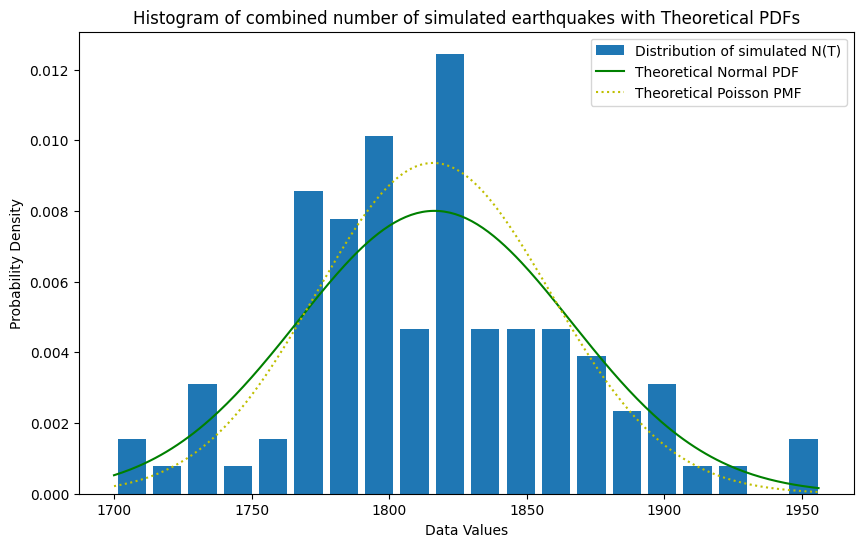

In [29]:
'''
Plotting the histogram of number of earthquakes that is combined from type 1 and type 2 simulated data and compare the fitted distribution of this to 2 probability distribution function:
Normal Distribution and Poisson distribution.
Then we check which distributions is a good fit to the distribution of number of earthquakes (N(T))
'''

# Using the method of moments the parameters for an Exponential, Normal, Gamma, and Poisson distribution are estimated
M1_NT_combine = sample_mean_NT_combine
M2_NT_combine = np.mean(np.square(sim_NT_combine))

# Initializating the Normal Distribution
muEst_NT_combine = M1_NT_combine # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_NT_combine = np.sqrt(M2_NT_combine - M1_NT_combine**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_NT_combine = stats.norm(muEst_NT_combine, sigmaEst_NT_combine)

# Initializing the Poisson Distribution
# E[X] = lambda
# Therefore, lambda could be estimated as M1
lamEst_Poi_NT_combine = M1_NT_combine
estPoisDist_NT_combine = stats.poisson(lamEst_Poi_NT_combine)

# Creating array serving as x-coordinates for plotting the theoretical PDF's/PMF
# Use of min() and max() to ensure that xs has the same range as sim_NT
xs_NT_combine = np.arange(min(sim_NT_combine), max(sim_NT_combine), 1)

# Visualising the distribution of N(T) together with the predefined distribution to check
# which distribution aligns the best with the distribution of the simulated data set
plt.figure(figsize=(10,6))
# Plot distribution of N(T) as a blue histogram
plt.hist(sim_NT_combine, rwidth = 0.8, bins=20, density=True, label = 'Distribution of simulated N(T)')
# Plot the theoretical Normal PDF as a solid green line
plt.plot(xs_NT_combine, estNormDist_NT_combine.pdf(xs_NT_combine), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical Poisson PMF as a dotted yellow line
plt.plot(xs_NT_combine, estPoisDist_NT_combine.pmf(xs_NT_combine), 'y', linestyle=':', label = 'Theoretical Poisson PMF')
plt.title('Histogram of combined number of simulated earthquakes with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

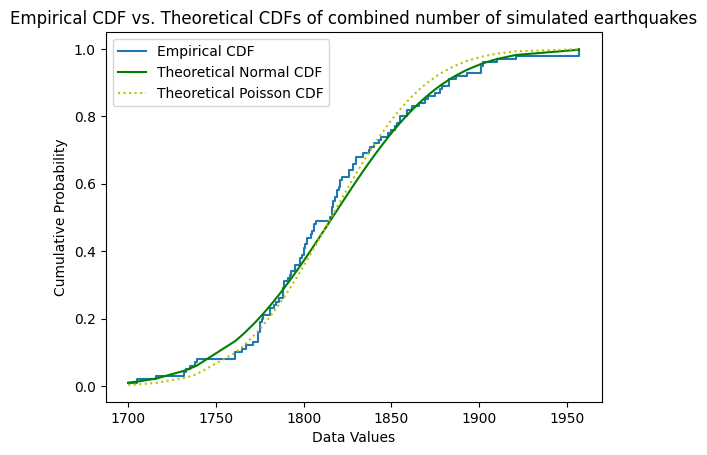

In [30]:
'''
Plotting the Empirical CDF of number of earthquakes that is combined from type 1 and type 2 simulated data and compare to 2 CDFs: 
Normal distribution, Gamma distribution, and Poisson distribution.
Then we check which distributions is a good fit to the emperical CDF of N(T)
'''

# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_NT_combine = np.sort(sim_NT_combine)
# ys is an array of cumulative probabilities and it matches the number of data points in x because it makes use of the len() function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_NT_combine = np.arange(1/len(sim_NT_combine), 1 + 1/len(sim_NT_combine), 1/len(sim_NT_combine))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_NT_combine, ys_NT_combine, where='post', label = 'Empirical CDF')
# Plot the theoretical normal CDF as a solid green line
plt.plot(xs2_NT_combine, estNormDist_NT_combine.cdf(xs2_NT_combine), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical poisson CDF as a dotted yellow line 
plt.plot(xs2_NT_combine, estPoisDist_NT_combine.cdf(xs2_NT_combine), 'y', linestyle=':', label = 'Theoretical Poisson CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of combined number of simulated earthquakes')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [31]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test for N(T)
# H0: the empirical distribution function tends to the chosen distribution function of N(T)
print("ktest Norm:", stats.kstest(sim_NT_combine, estNormDist_NT_combine.cdf))
print("ktest Poisson:", stats.kstest(sim_NT_combine, estPoisDist_NT_combine.cdf))

ktest Norm: KstestResult(statistic=0.07534849277747657, pvalue=0.5945158239176824, statistic_location=1822, statistic_sign=1)
ktest Poisson: KstestResult(statistic=0.0713378199109651, pvalue=0.6620993948873325, statistic_location=1807, statistic_sign=1)


## Method 2: Sampling over all earthquakes

### All earthquakes

In [32]:
# Simulate the number of earthquakes using the predefined function over a range of number of runs
sim_NT = [simEarthquakes(alphaEst, betaEst, T) for _ in range(nrRuns)]
# Calculate the sample mean of the simulation
sample_mean_NT = np.mean(sim_NT)
# Calculate the sample standard deviation of the simulation
sample_std_NT = np.std(sim_NT)

print(f'Mean N(T): {sample_mean_NT}')
print(f'Standard Deviation N(T): {sample_std_NT}')

# Create an confidence interval for the mean of N(T) using alpha = 0.05 resulting in a z-statistic of 1.96
# Since the standard deviation is unknown and replaced by a sample standard deviation should we actually use the t-statistic
# instead of the z-statistic. However, because we have so much data it is fine to use the z-statistic
halfwidth = 1.96 * sample_std_NT / np.sqrt(nrRuns)
print(f'Confidence interval mean N(T): {(sample_mean_NT - halfwidth, sample_mean_NT + halfwidth)}')
print(f'Confidence interval mean N(T): {sample_mean_NT} +/- {halfwidth}')

Mean N(T): 1809.93
Standard Deviation N(T): 45.29751759202705
Confidence interval mean N(T): (1801.0516865519628, 1818.8083134480373)
Confidence interval mean N(T): 1809.93 +/- 8.8783134480373


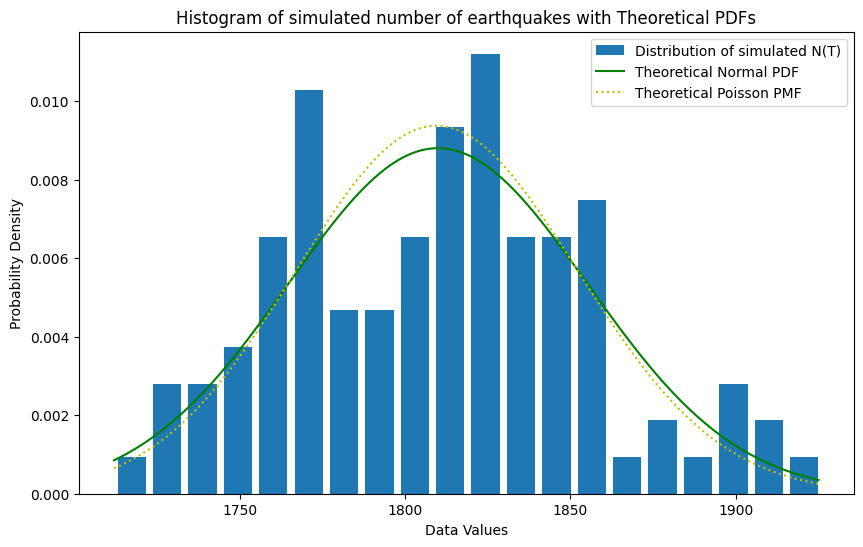

In [33]:
'''
Plotting the histogram of number of earthquakes and compare the fitted distribution of this to 2 probability distribution function:
Normal Distribution and Poisson distribution.
Then we check which distributions is a good fit to the distribution of number of earthquakes N(T)
'''

# Using the method of moments the parameters for an Exponential, Normal, Gamma, and Poisson distribution are estimated
M1_NT = sample_mean_NT
M2_NT = np.mean(np.square(sim_NT))

# Initializating the Normal Distribution
muEst_NT = M1_NT # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_NT = np.sqrt(M2_NT - M1_NT**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_NT = stats.norm(muEst_NT, sigmaEst_NT)

# Initializing the Poisson Distribution
# E[X] = lambda
# Therefore, lambda could be estimated as M1
lamEst_Poi_NT = M1_NT
estPoisDist_NT = stats.poisson(lamEst_Poi_NT)

# Creating array serving as x-coordinates for plotting the theoretical PDF's/PMF
# Use of min() and max() to ensure that xs has the same range as sim_NT
xs_NT = np.arange(min(sim_NT), max(sim_NT), 1)

# Visualising the distribution of N(T) together with the predefined distribution to check
# which distribution aligns the best with the distribution of the simulated data set
plt.figure(figsize=(10,6))
# Plot distribution of N(T) as a blue histogram
plt.hist(sim_NT, rwidth = 0.8, bins=20, density=True, label = 'Distribution of simulated N(T)')
# Plot the theoretical Normal PDF as a solid green line
plt.plot(xs_NT, estNormDist_NT.pdf(xs_NT), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical Poisson PMF as a dotted yellow line
plt.plot(xs_NT, estPoisDist_NT.pmf(xs_NT), 'y', linestyle=':', label = 'Theoretical Poisson PMF')
plt.title('Histogram of simulated number of earthquakes with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

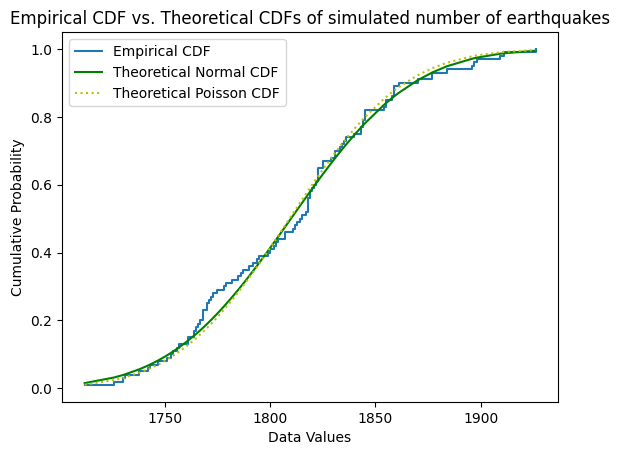

In [34]:
'''
Plotting the Empirical CDF of N(T) and compare to 2 CDFs: 
Normal distribution and Poisson distribution.
Then we check which distributions is a good fit to the emperical CDF of N(T)
'''
# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_NT = np.sort(sim_NT)
# ys is an array of cumulative probabilities and it matches the number of data points in NrType1 because it makes use of the len() function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_NT = np.arange(1/len(sim_NT), 1 + 1/len(sim_NT), 1/len(sim_NT))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the simulated data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_NT, ys_NT, where='post', label = 'Empirical CDF')
# Plot the theoretical Normal CDF as a solid green line
plt.plot(xs2_NT, estNormDist_NT.cdf(xs2_NT), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical Poisson CDF as a dotted yellow line
plt.plot(xs2_NT, estPoisDist_NT.cdf(xs2_NT), 'y', linestyle=':', label = 'Theoretical Poisson CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of simulated number of earthquakes')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [35]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test for N(T)
# H0: the empirical distribution function tends to the chosen distribution function of N(T)
print("ktest Norm:", stats.kstest(sim_NT, estNormDist_NT.cdf))
print("ktest Poisson:", stats.kstest(sim_NT, estPoisDist_NT.cdf))

ktest Norm: KstestResult(statistic=0.07254296128643961, pvalue=0.6417320904686157, statistic_location=1773, statistic_sign=1)
ktest Poisson: KstestResult(statistic=0.08379928296713124, pvalue=0.4590369561361817, statistic_location=1773, statistic_sign=1)


### Simulated Number of Earthquakes using the Simulation and obtained Probability

In [36]:
# Function to simulate the number of type 1 and 2 earthquakes using the simulation of N(T) and probability of the obtained type 2 earthquake
def NrTypesEarthquakes(probType1, probType2, sim_NT):
    rng = np.random.default_rng(1)
    # Create lists for the number of type 1 and 2 earthquakes
    NrType1 = []
    NrType2 = []
    
    # For every simulated value of N(T) simulate the number of type 1 and 2 earthquakes and store it in the given lists
    for NT in sim_NT:
        NumberType1 = 0
        NumberType2 = 0
        for eq in range(NT):
            X = rng.choice([1, 2], p = [probType1, probType2])
            if X == 1:
                NumberType1 += 1
            else:            
                NumberType2 += 1
    
        NrType1.append(NumberType1)
        NrType2.append(NumberType2)
    
    # Return lists for the number of type 1 and 2 earthquakes
    return NrType1, NrType2

# The probability of a type 1 earthquake is 1 - the probability of a type 2 earthquake
probType1 = 1 - prob_type2
# Probability of a type 2 eathquakes, this was calculated earlier
probType2 = prob_type2

# Extract the two lists from the function
NrType1, NrType2 = NrTypesEarthquakes(probType1, probType2, sim_NT)

# Calculate the mean number of type 1 earthquakes
MeanType1 = np.mean(NrType1)
print(f'Mean N1(T): {MeanType1}')
# Calculate the standard deviation of number of type 1 earthquakes
StdType1 = np.std(NrType1)
print(f'Standard Deviation N1(T): {StdType1}')
# Create a confidence interval for the mean number of type 1 earthquakes
halfwidthType1 = 1.96 * StdType1 / np.sqrt(nrRuns)
print(f'Confidence interval mean N1(T): {(MeanType1 - halfwidthType1, MeanType1 + halfwidthType1)}')
print(f'Confidence interval mean N1(T): {MeanType1} +/- {halfwidthType1}')

# Calculate the mean number of type 2 earthquakes
MeanType2 = np.mean(NrType2)
print(f'Mean N2(T): {MeanType2}')
# Calculate the standard deviation of number of type 2 earthquakes
StdType2 = np.std(NrType2)
print(f'Standard Deviation N2(T): {StdType2}')
# Create a confidence interval for the mean number of type 2 earthquakes
halfwidthType2 = 1.96 * StdType2 / np.sqrt(nrRuns)
print(f'Confidence interval mean N2(T): {(MeanType2 - halfwidthType2, MeanType2 + halfwidthType2)}')
print(f'Confidence interval mean N2(T): {MeanType2} +/- {halfwidthType2}')

Mean N1(T): 182.6
Standard Deviation N1(T): 12.293087488503447
Confidence interval mean N1(T): (180.1905548522533, 185.00944514774667)
Confidence interval mean N1(T): 182.6 +/- 2.4094451477466756
Mean N2(T): 1627.33
Standard Deviation N2(T): 43.88782405178001
Confidence interval mean N2(T): (1618.727986485851, 1635.9320135141488)
Confidence interval mean N2(T): 1627.33 +/- 8.602013514148881


#### Type 1 Earthquakes

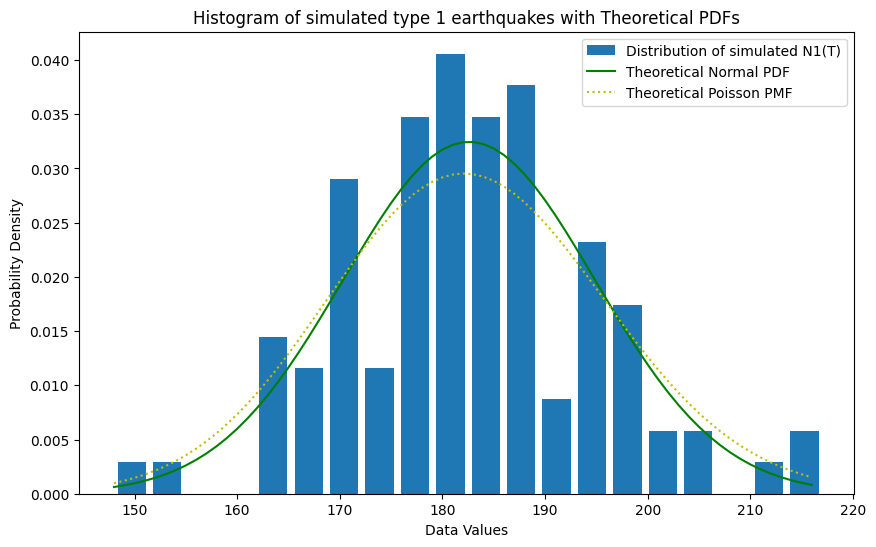

In [37]:
'''
Plotting the histogram of simulated number of type 1 earthquakes and compare the fitted distribution of this to 2 probability distribution function:
Normal Distribution and Poisson distribution.
Then we check which distributions is a good fit to the distribution of number of type 1 earthquakes (N1(T))
'''

# Using the method of moments the parameters for an Exponential, Normal, Gamma, and Poisson distribution are estimated
M1_NT_type1 = MeanType1
M2_NT_type1 = np.mean(np.square(NrType1))

# Initializating the Normal Distribution
muEst_NT_type1 = M1_NT_type1 # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_NT_type1 = np.sqrt(M2_NT_type1 - M1_NT_type1**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_NT_type1 = stats.norm(muEst_NT_type1, sigmaEst_NT_type1)

# Initializing the Poisson Distribution
# E[X] = lambda
# Therefore, lambda could be estimated as M1
lamEst_Poi_NT_type1 = M1_NT_type1
estPoisDist_NT_type1 = stats.poisson(lamEst_Poi_NT_type1)

# Creating array serving as x-coordinates for plotting the theoretical PDF's/PMF
# Use of min() and max() to ensure that xs has the same range as NrType1
xs_NT_type1 = np.arange(min(NrType1), max(NrType1), 1)

# Visualising the distribution of N1(T) together with the predefined distribution to check
# which distribution aligns the best with the distribution of the simulated data set
plt.figure(figsize=(10,6))
# Plot distribution of N1(T) as a blue histogram
plt.hist(NrType1, rwidth = 0.8, bins=20, density=True, label = 'Distribution of simulated N1(T)')
# Plot the theoretical Normal PDF as a solid green line
plt.plot(xs_NT_type1, estNormDist_NT_type1.pdf(xs_NT_type1), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical Poisson PMF as a dotted yellow line
plt.plot(xs_NT_type1, estPoisDist_NT_type1.pmf(xs_NT_type1), 'y', linestyle=':', label = 'Theoretical Poisson PMF')
plt.title('Histogram of simulated type 1 earthquakes with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

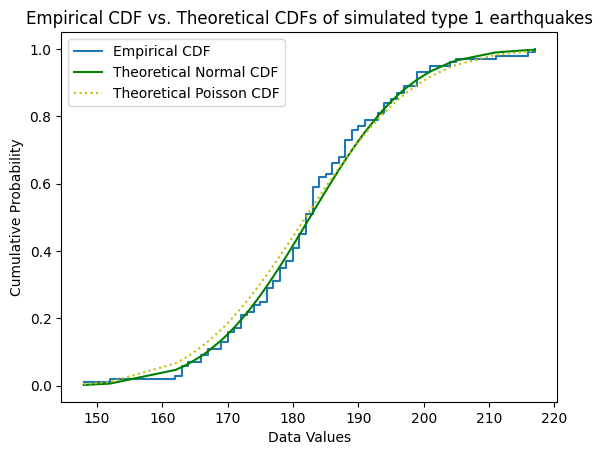

In [38]:
'''
Plotting the Empirical CDF of N1(T) and compare to 2 CDFs: 
Normal distribution and Poisson distribution.
Then we check which distributions is a good fit to the emperical CDF of N1(T)
'''
# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_NT_type1 = np.sort(NrType1)
# ys is an array of cumulative probabilities and it matches the number of data points in NrType1 because it makes use of the len() function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_NT_type1 = np.arange(1/len(NrType1), 1 + 1/len(NrType1), 1/len(NrType1))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the simulated data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_NT_type1, ys_NT_type1, where='post', label = 'Empirical CDF')
# Plot the theoretical Normal CDF as a solid green line
plt.plot(xs2_NT_type1, estNormDist_NT_type1.cdf(xs2_NT_type1), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical Poisson CDF as a dotted yellow line
plt.plot(xs2_NT_type1, estPoisDist_NT_type1.cdf(xs2_NT_type1), 'y', linestyle=':', label = 'Theoretical Poisson CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of simulated type 1 earthquakes')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [39]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test for N1(T)
# H0: the empirical distribution function tends to the chosen distribution function of N1(T)
print("ktest Norm:", stats.kstest(NrType1, estNormDist_NT_type1.cdf))
print("ktest Poisson:", stats.kstest(NrType1, estPoisDist_NT_type1.cdf))

ktest Norm: KstestResult(statistic=0.07702126233087347, pvalue=0.5667009189026295, statistic_location=183, statistic_sign=1)
ktest Poisson: KstestResult(statistic=0.07940536166344503, pvalue=0.527769771461231, statistic_location=176, statistic_sign=-1)


#### Type 2 Earthquakes

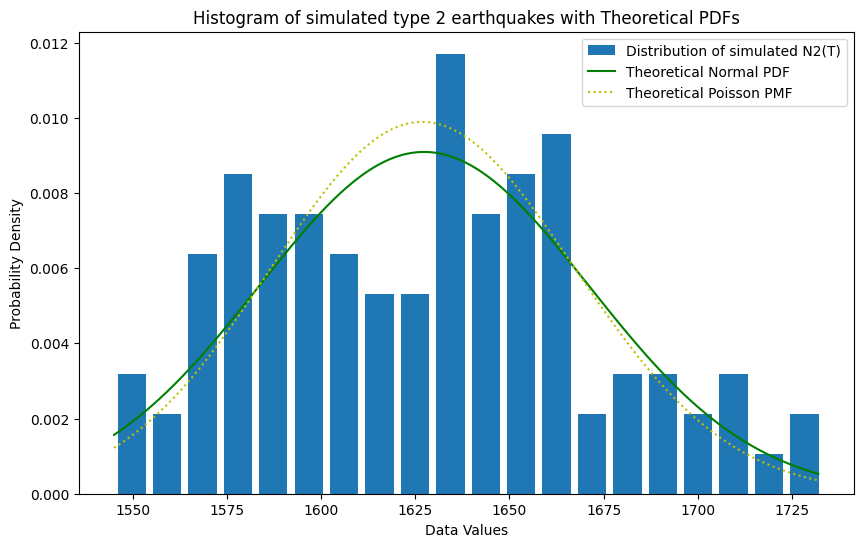

In [40]:
'''
Plotting the histogram of simulated number of type 2 earthquakes and compare the fitted distribution of this to 2 probability distribution function:
Normal Distribution and Poisson distribution.
Then we check which distributions is a good fit to the distribution of number of type 2 earthquakes (N2(T))
'''

# Using the method of moments the parameters for an Exponential, Normal, Gamma, and Poisson distribution are estimated
M1_NT_type2 = MeanType2
M2_NT_type2 = np.mean(np.square(NrType2))

# Initializating the Normal Distribution
muEst_NT_type2 = M1_NT_type2 # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_NT_type2 = np.sqrt(M2_NT_type2 - M1_NT_type2**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_NT_type2 = stats.norm(muEst_NT_type2, sigmaEst_NT_type2)

# Initializing the Poisson Distribution
# E[X] = lambda
# Therefore, lambda could be estimated as M1
lamEst_Poi_NT_type2 = M1_NT_type2
estPoisDist_NT_type2 = stats.poisson(lamEst_Poi_NT_type2)

# Creating array serving as x-coordinates for plotting the theoretical PDF's/PMF
# Use of min() and max() to ensure that xs has the same range as NrType2
xs_NT_type2 = np.arange(min(NrType2), max(NrType2), 1)

# Visualising the distribution of N2(T) together with the predefined distribution to check
# which distribution aligns the best with the distribution of the simulated data set
plt.figure(figsize=(10,6))
# Plot distribution of N2(T) as a blue histogram
plt.hist(NrType2, rwidth = 0.8, bins=20, density=True, label = 'Distribution of simulated N2(T)')
# Plot the theoretical Normal PDF as a solid green line
plt.plot(xs_NT_type2, estNormDist_NT_type2.pdf(xs_NT_type2), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical Poisson PMF as a dotted yellow line
plt.plot(xs_NT_type2, estPoisDist_NT_type2.pmf(xs_NT_type2), 'y', linestyle=':', label = 'Theoretical Poisson PMF')
plt.title('Histogram of simulated type 2 earthquakes with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

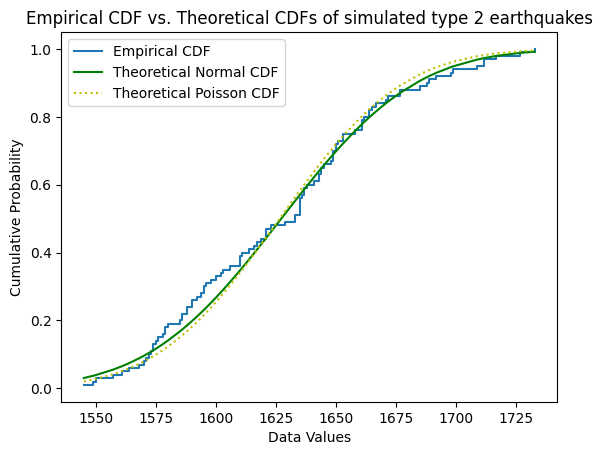

In [41]:
'''
Plotting the Empirical CDF of N2(T) and compare to 2 CDFs: 
Normal distribution and Poisson distribution.
Then we check which distributions is a good fit to the emperical CDF of N2(T)
'''
# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_NT_type2 = np.sort(NrType2)
# ys is an array of cumulative probabilities and it matches the number of data points in NrType2 because it makes use of the len() function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_NT_type2 = np.arange(1/len(NrType2), 1 + 1/len(NrType2), 1/len(NrType2))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the simulated data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_NT_type2, ys_NT_type2, where='post', label = 'Empirical CDF')
# Plot the theoretical Normal CDF as a solid green line
plt.plot(xs2_NT_type2, estNormDist_NT_type2.cdf(xs2_NT_type2), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical Poisson CDF as a dotted yellow line to make it clearer because it almost completely overlaps with the Normal and Gamma CDF
plt.plot(xs2_NT_type2, estPoisDist_NT_type2.cdf(xs2_NT_type2), 'y', linestyle=':', label = 'Theoretical Poisson CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of simulated type 2 earthquakes')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [42]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test for N2(T)
# H0: the empirical distribution function tends to the chosen distribution function of N2(T)
print("ktest Norm:", stats.kstest(NrType2, estNormDist_NT_type2.cdf))
print("ktest Poisson:", stats.kstest(NrType2, estPoisDist_NT_type2.cdf))

ktest Norm: KstestResult(statistic=0.07234479938754407, pvalue=0.6450807025740939, statistic_location=1596, statistic_sign=1)
ktest Poisson: KstestResult(statistic=0.08713047132564739, pvalue=0.41017211660890673, statistic_location=1596, statistic_sign=1)


## Sensitivity Analysis

In [43]:
def secSimEarthquakes(interArrNT, T):
    Nt = 0 # Counting the number of earthquakes
       
    i = np.random.randint(0, len(interArrNT)) # Time variable
    t = interArrNT[i]
    
    # The simulation is done for one year, so as long as the time variable is smaller than one year the simulation will continue
    while t < T:
        i = np.random.randint(0, len(interArrNT)-1)
        Nt += 1 # An earthquake occured, so counter raised by one
        t += interArrNT[i] # Time variable is raised by the inter arrival time, which distribution is defined above

    return Nt # Return the number of earthquakes that occured in the next year (365 days)

### N(T)

In [44]:
interArrNT = x.copy().to_list()
sec_sim_NT = [secSimEarthquakes(interArrNT, T) for _ in range(nrRuns)]

sample_mean_sec_NT = np.mean(sec_sim_NT)
sample_std_sec_NT = np.std(sec_sim_NT)

print(f'Mean N(T): {sample_mean_sec_NT}')
print(f'Standard Deviation N(T): {sample_std_sec_NT}')

halfwidth_secNT = 1.96 * sample_std_sec_NT / np.sqrt(nrRuns)
print(f'Confidence interval mean N(T): {sample_mean_sec_NT} +/- {halfwidth_secNT}')

Mean N(T): 1815.27
Standard Deviation N(T): 45.95538162174263
Confidence interval mean N(T): 1815.27 +/- 9.007254797861556


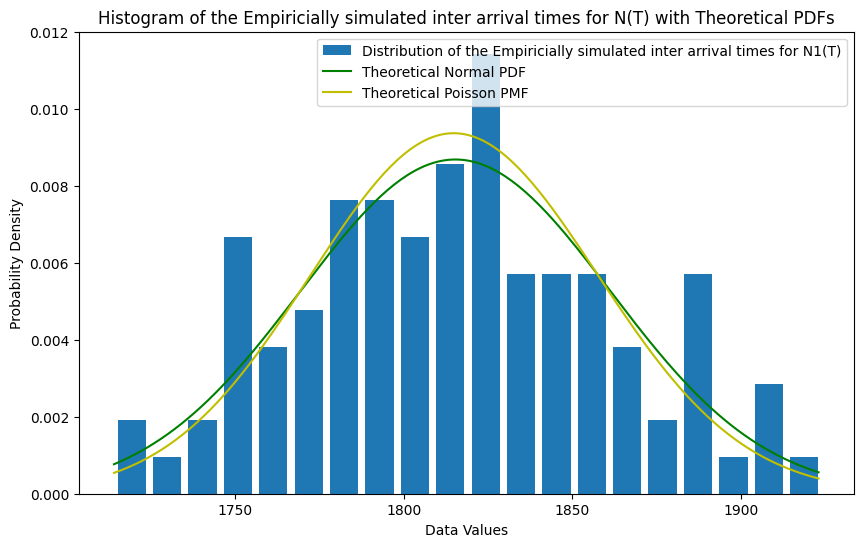

In [45]:
'''
Plotting the histogram of the Empirically simulated inter arrival times for total number of earthquakes and compare the fitted distribution of this to 2 probability distribution function:
Normal Distribution and Poisson distribution.
Then we check which distributions is a good fit to the distribution of N(T)
'''

# Using the method of moments the parameters for an exponential, normal, and gamma distribution are estimated
M1_emp = sample_mean_sec_NT
M2_emp = np.mean(np.square(sec_sim_NT))

# Initializating the Normal Distribution
muEst_emp = M1_emp # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_emp = np.sqrt(M2_emp - M1_emp**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_emp = stats.norm(muEst_emp, sigmaEst_emp)

# Initializing the Poisson Distribution
# E[X] = lambda
# Therefore, lambda could be estimated as M1
lamEst_emp = M1_emp
estPoisDist_emp = stats.poisson(lamEst_emp)

# Creating array serving as x-coordinates for plotting the theoretical PDF's/PMF
# Use of min() and max() to ensure that xs has the same range as NrType2
xs_emp_NT = np.arange(min(sec_sim_NT), max(sec_sim_NT), 1)

# Visualising the distribution of N1(T) together with the predefined distribution to check
# which distribution aligns the best with the distribution of the data set
plt.figure(figsize=(10,6))
# Plot distribution of N1(T) as a blue histogram
plt.hist(sec_sim_NT, rwidth = 0.8, bins=20, density=True, label = 'Distribution of the Empiricially simulated inter arrival times for N1(T)')
# Plot the theoretical Normal PDF as a solid green line
plt.plot(xs_emp_NT, estNormDist_emp.pdf(xs_emp_NT), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical Poisson PMF as a dotted yellow line
plt.plot(xs_emp_NT, estPoisDist_emp.pmf(xs_emp_NT), 'y', label = 'Theoretical Poisson PMF')
plt.title('Histogram of the Empiricially simulated inter arrival times for N(T) with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

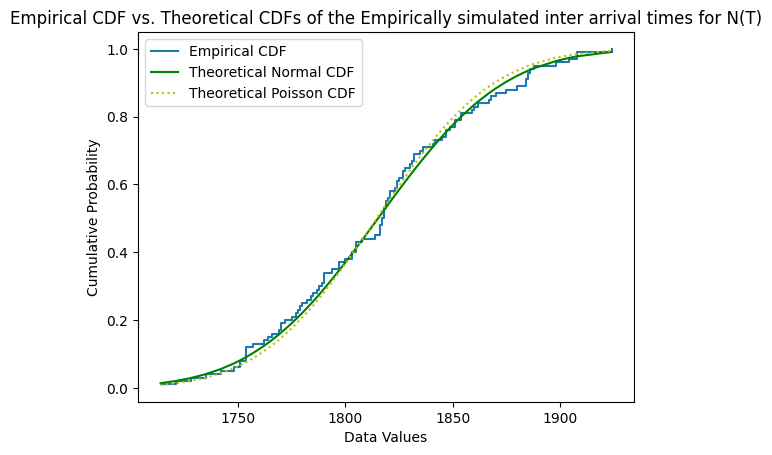

In [46]:
'''
Plotting the Empirical CDF of the Empirically simulated inter arrival times for N(T) and compare to 2 CDFs: 
Normal distribution and Poisson distribution.
Then we check which distributions is a good fit to the emperical CDF of N(T)
'''
# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_emp = np.sort(sec_sim_NT)
# ys is an array of cumulative probabilities and it matches the number of data points in x because it makes use of the len(x) function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_emp = np.arange(1/len(sec_sim_NT), 1 + 1/len(sec_sim_NT), 1/len(sec_sim_NT))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_emp, ys_emp, where='post', label = 'Empirical CDF')
# Plot the theoretical normal CDF as a solid green line
plt.plot(xs2_emp, estNormDist_emp.cdf(xs2_emp), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical poisson CDF as a dotted yellow line 
plt.plot(xs2_emp, estPoisDist_emp.cdf(xs2_emp), 'y', linestyle=':', label = 'Theoretical Poisson CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of the Empirically simulated inter arrival times for N(T)')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [47]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test for N(T) for inter arrival times that is Empirically distributed
# H0: the empirical distribution function tends to the chosen distribution function of N(T)
print("ktest Norm:", stats.kstest(sec_sim_NT, estNormDist_emp.cdf))
print("ktest Poisson:", stats.kstest(sec_sim_NT, estPoisDist_emp.cdf))

ktest Norm: KstestResult(statistic=0.05633692088231895, pvalue=0.8908666201734354, statistic_location=1816, statistic_sign=-1)
ktest Poisson: KstestResult(statistic=0.06307400979178374, pvalue=0.7974545319353258, statistic_location=1816, statistic_sign=-1)


### N1(T)

In [48]:
interArrN1T = x_type1.copy().to_list()
sec_sim_N1T = [secSimEarthquakes(interArrN1T, T) for _ in range(nrRuns)]

sample_mean_sec_N1T = np.mean(sec_sim_N1T)
sample_std_sec_N1T = np.std(sec_sim_N1T)

print(f'Mean N1(T): {sample_mean_sec_N1T}')
print(f'Standard Deviation N1(T): {sample_std_sec_N1T}')

halfwidth_secN1T = 1.96 * sample_std_sec_N1T / np.sqrt(nrRuns)
print(f'Confidence interval mean N1(T): {sample_mean_sec_N1T} +/- {halfwidth_secN1T}')

Mean N1(T): 184.99
Standard Deviation N1(T): 15.288227496999122
Confidence interval mean N1(T): 184.99 +/- 2.9964925894118277


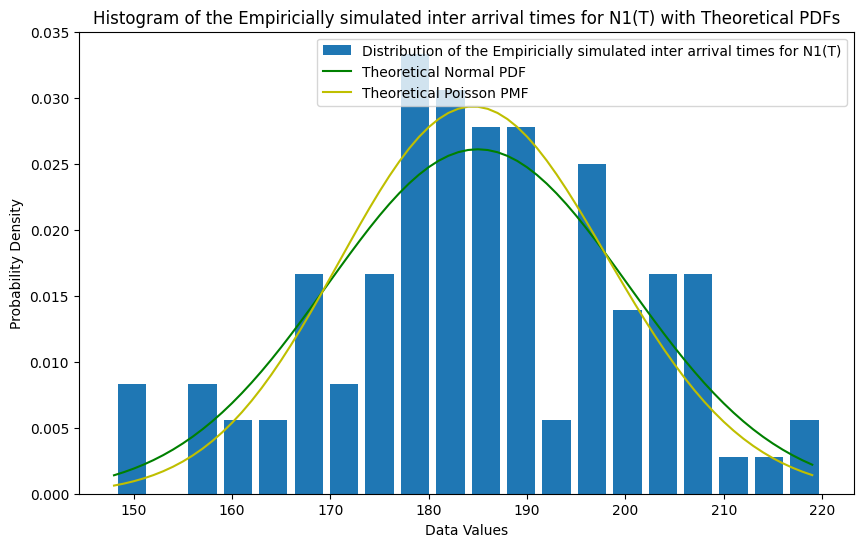

In [49]:
'''
Plotting the histogram of the Empirically simulated inter arrival times for N1(T) and compare the fitted distribution of this to 4 probability distribution function:
Normal Distribution and Poisson distribution.
Then we check which distributions is a good fit to the distribution of N1(T)
'''

# Using the method of moments the parameters for an exponential, normal, and gamma distribution are estimated
M1_emp_N1T = sample_mean_sec_N1T
M2_emp_N1T = np.mean(np.square(sec_sim_N1T))

# Initializating the Normal Distribution
muEst_emp_N1T = M1_emp_N1T # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_emp_N1T = np.sqrt(M2_emp_N1T - M1_emp_N1T**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_emp_N1T = stats.norm(muEst_emp_N1T, sigmaEst_emp_N1T)

# Initializing the Poisson Distribution
# E[X] = lambda
# Therefore, lambda could be estimated as M1
lamEst_emp_N1T = M1_emp_N1T
estPoisDist_emp_N1T = stats.poisson(lamEst_emp_N1T)

# Creating array serving as x-coordinates for plotting the theoretical PDF's/PMF
# Use of min() and max() to ensure that xs has the same range as NrType2
xs_emp_N1T = np.arange(min(sec_sim_N1T), max(sec_sim_N1T), 1)

# Visualising the distribution of N1(T) together with the predefined distribution to check
# which distribution aligns the best with the distribution of the data set
plt.figure(figsize=(10,6))
# Plot distribution of N1(T) as a blue histogram
plt.hist(sec_sim_N1T, rwidth = 0.8, bins=20, density=True, label = 'Distribution of the Empiricially simulated inter arrival times for N1(T)')
# Plot the theoretical Normal PDF as a solid green line
plt.plot(xs_emp_N1T, estNormDist_emp_N1T.pdf(xs_emp_N1T), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical Poisson PMF as a dotted yellow line
plt.plot(xs_emp_N1T, estPoisDist_emp_N1T.pmf(xs_emp_N1T), 'y', label = 'Theoretical Poisson PMF')
plt.title('Histogram of the Empiricially simulated inter arrival times for N1(T) with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

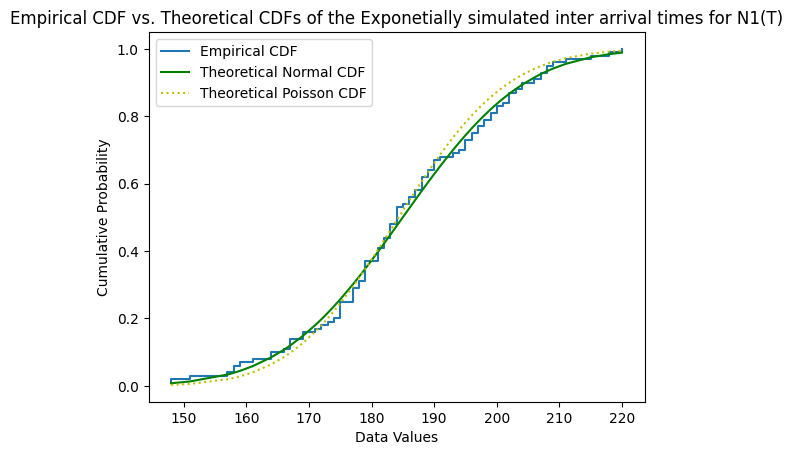

In [50]:
'''
Plotting the Empirical CDF of the Empirically simulated inter arrival times for N1(T) and compare to 2 CDFs: 
Normal distribution and Poisson distribution.
Then we check which distributions is a good fit to the emperical CDF of N1(T)
'''
# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_emp_N1T = np.sort(sec_sim_N1T)
# ys is an array of cumulative probabilities and it matches the number of data points in x because it makes use of the len(x) function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_emp_N1T = np.arange(1/len(sec_sim_N1T), 1 + 1/len(sec_sim_N1T), 1/len(sec_sim_N1T))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_emp_N1T, ys_emp_N1T, where='post', label = 'Empirical CDF')
# Plot the theoretical normal CDF as a solid green line
plt.plot(xs2_emp_N1T, estNormDist_emp_N1T.cdf(xs2_emp_N1T), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical poisson CDF as a dotted yellow line 
plt.plot(xs2_emp_N1T, estPoisDist_emp_N1T.cdf(xs2_emp_N1T), 'y', linestyle=':', label = 'Theoretical Poisson CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of the Exponetially simulated inter arrival times for N1(T)')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()  

In [51]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test for N1(T) for inter arrival times that is Empirically distributed
# H0: the empirical distribution function tends to the chosen distribution function of N1(T)
print("ktest Norm:", stats.kstest(sec_sim_N1T, estNormDist_emp_N1T.cdf))
print("ktest Poisson:", stats.kstest(sec_sim_N1T, estPoisDist_emp_N1T.cdf))

ktest Norm: KstestResult(statistic=0.05673505142291696, pvalue=0.8860314390207042, statistic_location=175, statistic_sign=-1)
ktest Poisson: KstestResult(statistic=0.08163602391529445, pvalue=0.4923245228613883, statistic_location=195, statistic_sign=-1)


### N2(T)

In [52]:
interArrN2T = x_type2.copy().to_list()
sec_sim_N2T = [secSimEarthquakes(interArrN2T, T) for _ in range(nrRuns)]

sample_mean_sec_N2T = np.mean(sec_sim_N2T)
sample_std_sec_N2T = np.std(sec_sim_N2T)

print(f'Mean N1(T): {sample_mean_sec_N2T}')
print(f'Standard Deviation N1(T): {sample_std_sec_N2T}')

halfwidth_secN2T = 1.96 * sample_std_sec_N2T / np.sqrt(nrRuns)
print(f'Confidence interval mean N1(T): {sample_mean_sec_N2T} +/- {halfwidth_secN2T}')

Mean N1(T): 1622.05
Standard Deviation N1(T): 44.43295511216872
Confidence interval mean N1(T): 1622.05 +/- 8.708859201985069


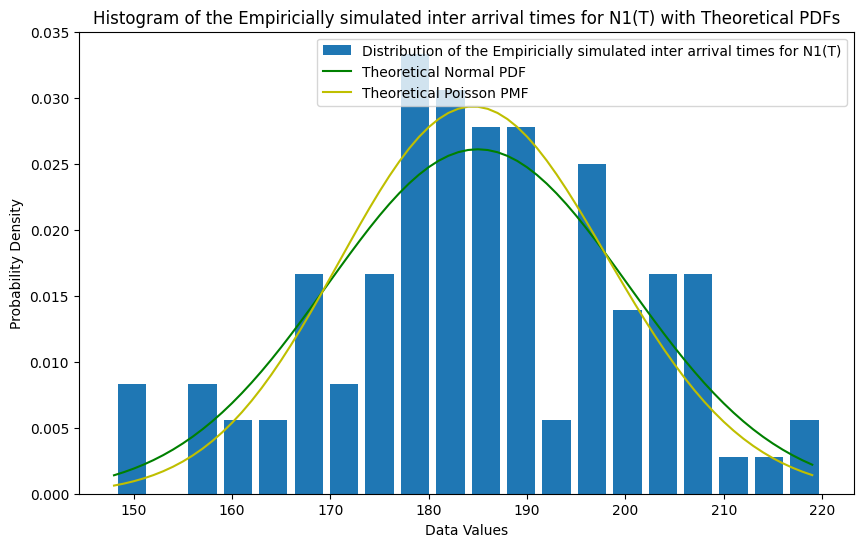

In [53]:
'''
Plotting the histogram of the Empirically simulated inter arrival times for N2(T) and compare the fitted distribution of this to 2 probability distribution function:
Normal Distribution and Poisson distribution.
Then we check which distributions is a good fit to the distribution of N2(T)
'''

# Using the method of moments the parameters for an exponential, normal, and gamma distribution are estimated
M1_emp_N2T = sample_mean_sec_N2T
M2_emp_N2T = np.mean(np.square(sec_sim_N2T))

# Initializating the Normal Distribution
muEst_emp_N2T = M1_emp_N2T # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_emp_N2T = np.sqrt(M2_emp_N2T - M1_emp_N2T**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_emp_N2T = stats.norm(muEst_emp_N2T, sigmaEst_emp_N2T)

# Initializing the Poisson Distribution
# E[X] = lambda
# Therefore, lambda could be estimated as M1
lamEst_emp_N2T = M1_emp_N2T
estPoisDist_emp_N2T = stats.poisson(lamEst_emp_N2T)

# Creating array serving as x-coordinates for plotting the theoretical PDF's/PMF
# Use of min() and max() to ensure that xs has the same range as NrType2
xs_emp_N2T = np.arange(min(sec_sim_N2T), max(sec_sim_N2T), 1)

# Visualising the distribution of N1(T) together with the predefined distribution to check
# which distribution aligns the best with the distribution of the data set
plt.figure(figsize=(10,6))
# Plot distribution of N1(T) as a blue histogram
plt.hist(sec_sim_N1T, rwidth = 0.8, bins=20, density=True, label = 'Distribution of the Empiricially simulated inter arrival times for N1(T)')
# Plot the theoretical Normal PDF as a solid green line
plt.plot(xs_emp_N1T, estNormDist_emp_N1T.pdf(xs_emp_N1T), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical Poisson PMF as a dotted yellow line
plt.plot(xs_emp_N1T, estPoisDist_emp_N1T.pmf(xs_emp_N1T), 'y', label = 'Theoretical Poisson PMF')
plt.title('Histogram of the Empiricially simulated inter arrival times for N1(T) with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

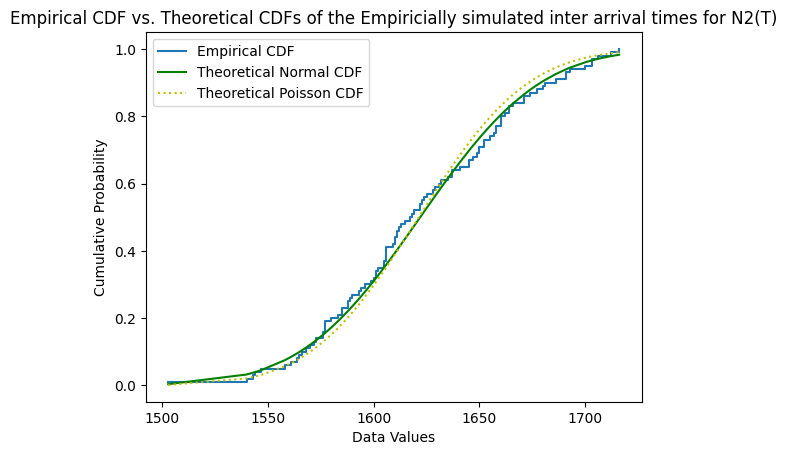

In [54]:
'''
Plotting the Empirical CDF of the Empirically simulated inter arrival times for N1(T) and compare to 2 CDFs: 
Normal distribution and Poisson distribution.
Then we check which distributions is a good fit to the emperical CDF of N1(T)
'''
# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_emp_N2T = np.sort(sec_sim_N2T)
# ys is an array of cumulative probabilities and it matches the number of data points in x because it makes use of the len(x) function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_emp_N2T = np.arange(1/len(sec_sim_N2T), 1 + 1/len(sec_sim_N2T), 1/len(sec_sim_N2T))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_emp_N2T, ys_emp_N2T, where='post', label = 'Empirical CDF')
# Plot the theoretical normal CDF as a solid green line
plt.plot(xs2_emp_N2T, estNormDist_emp_N2T.cdf(xs2_emp_N2T), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical poisson CDF as a dotted yellow line 
plt.plot(xs2_emp_N2T, estPoisDist_emp_N2T.cdf(xs2_emp_N2T), 'y', linestyle=':', label = 'Theoretical Poisson CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of the Empiricially simulated inter arrival times for N2(T)')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()  

In [55]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test for N2(T) for inter arrival times that is Empirically distributed
# H0: the empirical distribution function tends to the chosen distribution function of N2(T)
print("ktest Norm:", stats.kstest(sec_sim_N1T, estNormDist_emp_N2T.cdf))
print("ktest Poisson:", stats.kstest(sec_sim_N1T, estPoisDist_emp_N2T.cdf))

ktest Norm: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=220, statistic_sign=1)
ktest Poisson: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=220, statistic_sign=1)
